## - Abstracto con Motivación y Audiencia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

El presente análisis, surge de la necesidad de conocer los distintos tipos de combustibles que utilizan los automóviles actualmente y su grado de emisión de gases CO2, los cuales son contaminantes para nuestro medio ambiente. Los principales destinatarios de este informe, deberían ser los mismos fabricantes de automotores, así como también cualquier propietario de ellos y, las instituciones públicas relacionadas con el medio ambiente, ya que estas últimas deberían arbitrar y sancionar (de corresponder) a quienes fabriquen y posean automóviles con altos grados de emisión de CO2.

## - Definición de Objetivo

Nuestro objetivo principal y final, es dar respuesta a la siguiente pregunta:
### ¿Cómo podemos reducir la emisión de gases contaminantes CO2 producidos por los automóviles?

## - Contexto Comercial

De los gases que salen del caño de escape de cualquier auto con motor a combustión, hay uno que se ha convertido en el enemigo público número uno de la industria automotriz. Es el dióxido de carbono –CO2–, responsable de buena parte del Calentamiento Global que amenaza la vida humana tal cual la conocemos. La Unión Europea se puso a la vanguardia para combatirlo, con unas normativas extremadamente severas que incluyen multas multimillonarias a las automotrices. Y esto está acelerando los cambios en una industria que ya no volverá a ser la misma. Va siendo hora que nos metamos en un tema que es bastante más complejo de lo que parece, y que tarde o temprano nos terminará impactando.



## - Problema Comercial

Las preguntas a responder, con respecto a este estudio, deberían ser por lo menos las siguientes:

. ¿Qué tipos de combustibles se utilizan actualmente en los automóviles?

. ¿Qué alternativas existen, hoy en día, a los motores que funcionan por combustión?

. ¿Cuales son, principalmente, los combustibles que generan mayores niveles de CO2?

. ¿A mayor cilindrada y tamaño de motor, es mayor el grado de emisión de CO2?

. ¿Cuál es el nivel de variación de emisión de CO2 que se dió en los últimos años?

. Los fabricantes de automóviles, ¿han tenido consideración realmente de este aspecto, a lo largo de los años?

. ¿Cuál fue la evolución de las multas/sanciones impuestas por los Organismos de Control en esta materia?

. ¿Qué otras alternativas de movilidad/transporte encontramos actualmente? ¿Cuál ha sido su variación en el uso, durante la última época?

## - Contexto Analítico

Para este trabajo, se seleccionó una base de datos que contiene registros de emisiones de dióxido de carbono de automóviles con datos de motores, combustibles, transmisiones, consumos, etc. Esta base, tiene registros con los datos de los automóviles comercializados durante 7 años (7685 registros). Al existir automóviles mecanicamente iguales, que se venden con diferente equipamiento, hay registros duplicados. Las emisiones de CO2 se miden en gr/km y en consumo combinado (ciudad y ruta).

## - E.D.A.

Comenzamos con la importación de librerías y la carga de nuestro Dataset:

In [ ]:
# Primero se importan librerías:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
mpl.style.use('bmh')

# Cargamos nuestra base de datos y observamos los primeros valores:
CO2 = pd.read_excel("/content/CO2 Emissions (1).xlsx")
#CO2.shape
CO2.head(10)
#CO2.tail(10)

,Make,Model,Vehicle Class,Engine_Size_L,Cylinders,Transmission,Fuel Type,FuelType1,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption Comb (Kmpl),Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,Premium gasoline,9.9,6.7,8.5,33,14.029752,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,Premium gasoline,11.2,7.7,9.6,29,12.329176,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,Premium gasoline,6.0,5.8,5.9,48,20.406912,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,Premium gasoline,12.7,9.1,11.1,25,10.628600,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,Premium gasoline,12.1,8.7,10.6,27,11.478888,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,Premium gasoline,11.9,7.7,10.0,28,11.904032,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,Premium gasoline,11.8,8.1,10.1,28,11.904032,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,Premium gasoline,12.8,9.0,11.1,25,10.628600,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,Premium gasoline,13.4,9.5,11.6,24,10.203456,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,Premium gasoline,10.6,7.5,9.2,31,13.179464,212


In [ ]:
# Verificación de datos nulos
CO2.isnull().values.any()

False

In [ ]:
# Verificación de datos nulos - Otra manera
CO2.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine_Size_L                       0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Type1                          0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
Fuel Consumption Comb (Kmpl)        0
Emissions                           0
dtype: int64

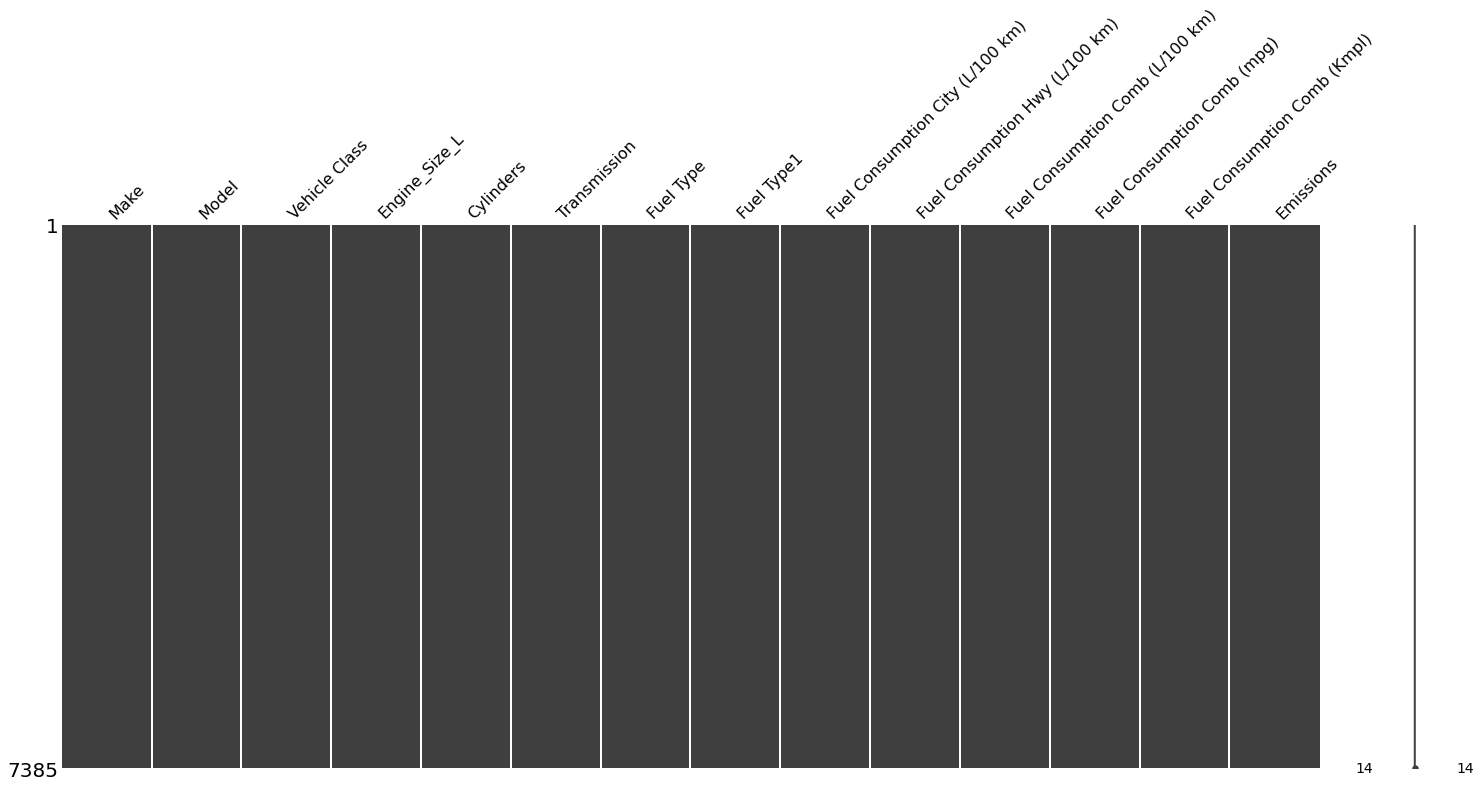

In [ ]:
import missingno as msno
msno.matrix(CO2)

In [ ]:
# Tamaño de nuestro Dataset: (7385 registros y 14 columnas/variables)
CO2.shape

(7385, 14)

In [ ]:
# Verifico datos duplicados debido a versiones del mismo automóvil con diferente equipamiento.

CO2.duplicated().sum()
print('Hay un total de ' + (str(CO2.duplicated().sum()) + ' duplicados en el dataset.'))

Hay un total de 1103 duplicados en el dataset.


In [ ]:
# Borro entradas duplicadas
CO2.drop_duplicates(inplace = True)
CO2.duplicated().sum()
print('Hay un total de ' + (str(CO2.duplicated().sum()) + ' duplicados en el dataset.'))

Hay un total de 0 duplicados en el dataset.


In [ ]:
# La base de datos queda ahora de un tamaño menor:
CO2.shape

(6282, 14)

In [ ]:
# Al borrar duplicados, hay que vover a inicializar el índice
CO2 = CO2.reset_index(drop = True)
CO2.tail()

,Make,Model,Vehicle Class,Engine_Size_L,Cylinders,Transmission,Fuel Type,Fuel Type1,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption Comb (Kmpl),Emissions
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,Premium gasoline,10.7,7.7,9.4,30,12.754320,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,Premium gasoline,11.2,8.3,9.9,29,12.329176,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,Premium gasoline,11.7,8.6,10.3,27,11.478888,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,Premium gasoline,11.2,8.3,9.9,29,12.329176,232
6281,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,Premium gasoline,12.2,8.7,10.7,26,11.053744,248


Se utilizarán los datos de la base para encontrar correlaciones entre distintas características de los automóviles y las emisiones de CO2.

Para iniciar, se buscará una correlación entre la cilindrada y el número de cilindros versus la emisión de CO2.

###PANDAS PROFILING: Overview de las variables del dataset###


Para seguir conociendo en mayor detalle el Dataset, y entender mas en profundidad las medidas descriptivas y relaciones de cada variable del mismo, realizamos el Pandas Profiling: 

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.0 MB 23.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 25.6 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=f6c17a8543b89353d535ccbc9613069ef74bb5dd1b5d4a0e1f4bb93f6faef31b
  Stored in directory: /tmp/pip-ephem-wheel-cache-tmfpqdr_/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha25

In [ ]:
# Data Profiling
import pandas_profiling
profile = pandas_profiling.ProfileReport(CO2)
profile

###Conociendo a la variable objetivo: Emissions - Emisiones de CO2:###

Text(0.5, 1.0, 'Histograma de Emisiones CO2')

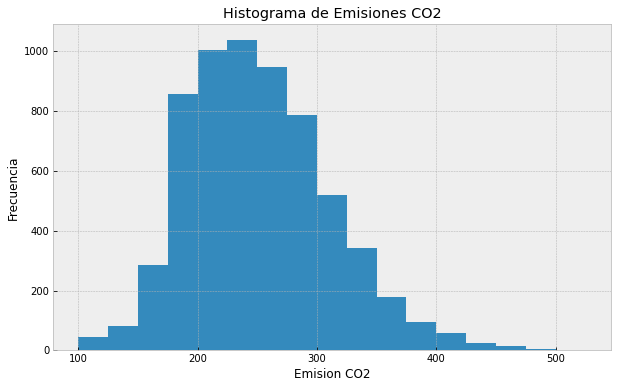

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= CO2['Emissions'], bins=range(100,550,25), density=False,)
ax.set_xlabel('Emision CO2')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Emisiones CO2')

Se ve una distribución de datos del tipo gaussiana (asimétrica derecha) para la variable objetivo, con una media aproximada de 250.

In [ ]:
# Se comprueba que la variable Emisiones de CO2 tiene una media de 250.

CO2.Emissions.mean()

251.1577523081821

Text(0.5, 1.0, 'Boxplot de Emisiones')

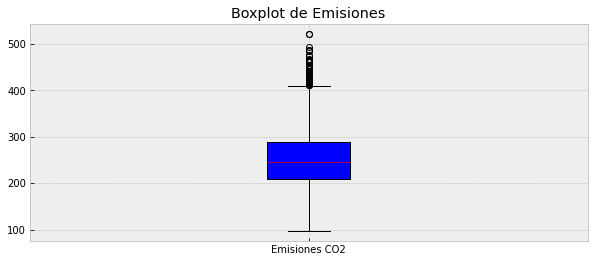

In [ ]:
# Chequeando cómo se distribuyen los valores para esta variable:

fig, ax = plt.subplots(figsize=(10, 4))
ax.boxplot(CO2['Emissions'], labels=["Emisiones CO2"],patch_artist=True)
ax.set_title('Boxplot de Emisiones')

En este boxplot para la variable objetivo, Emisiones, se ven los cuartiles definidos y la mediana en 250 y los outliers para valores superiones a 400.

###Análisis Bivariado###

In [ ]:
# Análisis entre una variable categórica (Tipo de Combustible o Fuel Tipe) con nuestra varible objetivo que es del tipo numérica (emisiones de CO2 o Emissions)

CO2.groupby('FuelType1')['Emissions'].mean().sort_values(ascending=False)



FuelType1
Ethanol             275.091892
Premium gasoline    266.043410
Diesel              237.548571
Regular gasoline    235.119329
Natural Gas         213.000000
Name: Emissions, dtype: float64

In [ ]:
CO2.groupby('FuelType1')['Emissions'].describe()

,count,mean,std,min,25%,50%,75%,max
FuelType1,,,,,,,,
Diesel,175.0,237.548571,41.817704,169.0,198.0,245.0,271.0,326.0
Ethanol,370.0,275.091892,47.093198,128.0,248.0,279.0,299.0,418.0
Natural Gas,1.0,213.000000,NaN,213.0,213.0,213.0,213.0,213.0
Premium gasoline,3202.0,266.043410,56.695972,122.0,225.0,255.0,301.0,522.0
Regular gasoline,3637.0,235.119329,57.401473,96.0,192.0,228.0,274.0,488.0


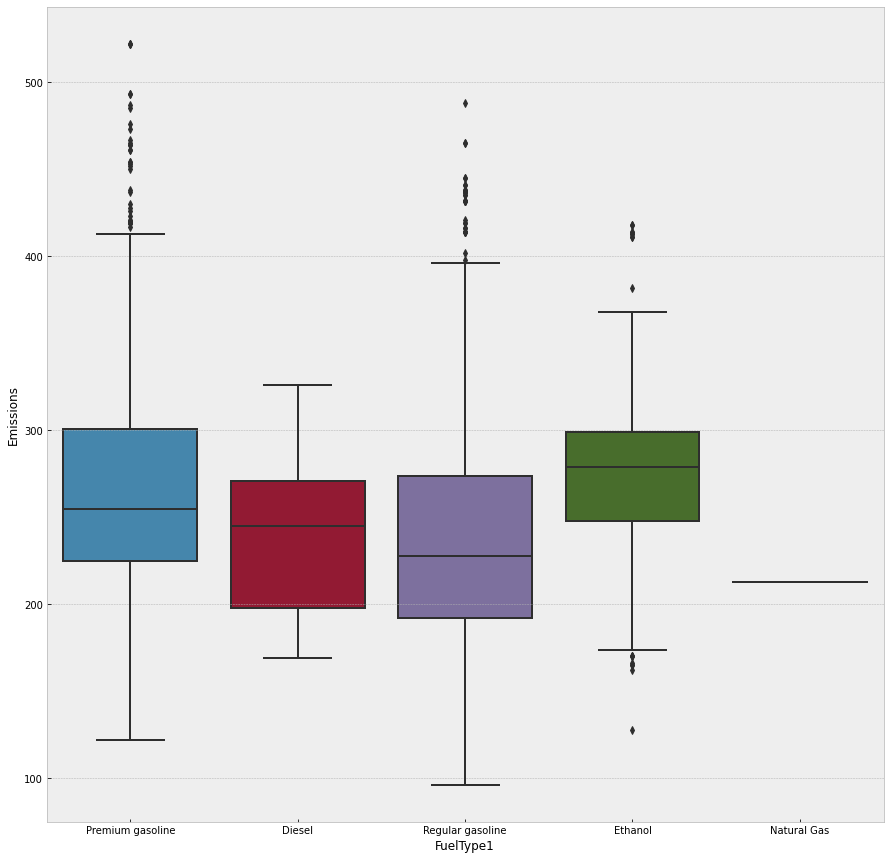

In [ ]:
plt.figure(figsize=(15,15)) # defino el tamaño del grafico
sns.boxplot(y = 'Emissions', x = 'FuelType1', data = CO2)
plt.show()

La mediana tiene valores similares para cada tipo de combustible, excepto el gas natural, que hay un solo valor en el dataset.


### Análisis de Correlaciones Lineales entre Variables Numéricas###

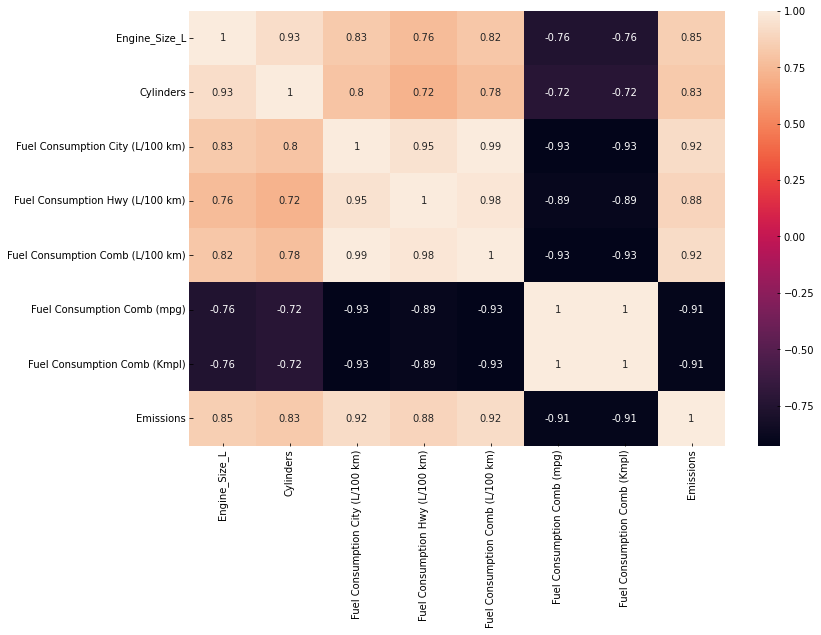

In [ ]:
plt.figure(figsize=(12, 8))

CO2 = CO2.corr()
sns.heatmap(CO2, 
            xticklabels = CO2.columns.values,
            yticklabels = CO2.columns.values,
            annot = True);

Para la Variable Objetivo, Emisiones de CO2, vemos cómo se relaciona con el resto de las variables del dataset:

In [ ]:
CO2.corr()['Emissions']

Engine_Size_L                       0.990889
Cylinders                           0.987259
Fuel Consumption City (L/100 km)    0.997748
Fuel Consumption Hwy (L/100 km)     0.994656
Fuel Consumption Comb (L/100 km)    0.997014
Fuel Consumption Comb (mpg)        -0.998334
Fuel Consumption Comb (Kmpl)       -0.998334
Emissions                           1.000000
Name: Emissions, dtype: float64

###Análisis Multivarido###

Empecemos a ver la relación de nuestra variable objetivo, emisiones de CO2 ("Emissions"), con otras del dataset:

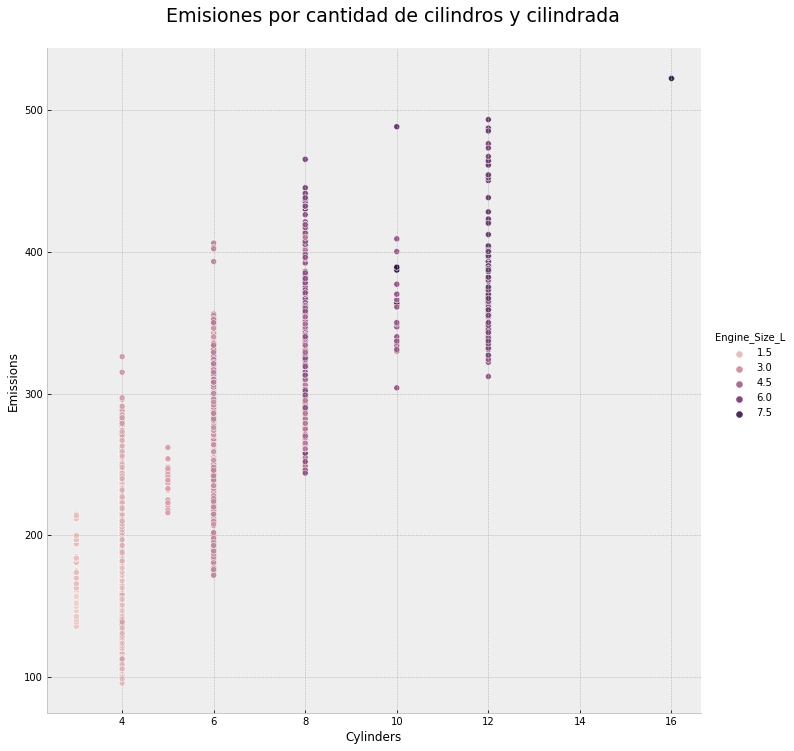

In [ ]:
# Análisis de correlación entre la cantidad de cilindros y la emisión, con detalle en la cilindrada

cilindrada_co2 = sns.pairplot(
    CO2,
    x_vars = ['Cylinders'],
    y_vars = ['Emissions'],
    hue = 'Engine_Size_L',
    height = 10
)

cilindrada_co2.fig.suptitle("Emisiones por cantidad de cilindros y cilindrada", y = 1.04, fontsize = 19);

Se puede observar que existe una esperada correlación entre la cilindrada y el número de cilindros, con la emisión de dióxido de carbono. 

Motores más grandes y con mayor número de cilindros generan más emisiones.

Los motores más eficientes son los de 4 cilindros con cilindradas entre 1.4 y 2 litros.

En el segundo análisis, se buscará una posible correlación entre el tipo de combustible y la emisión, para determinar qué combustible es el que genera menor emisión.

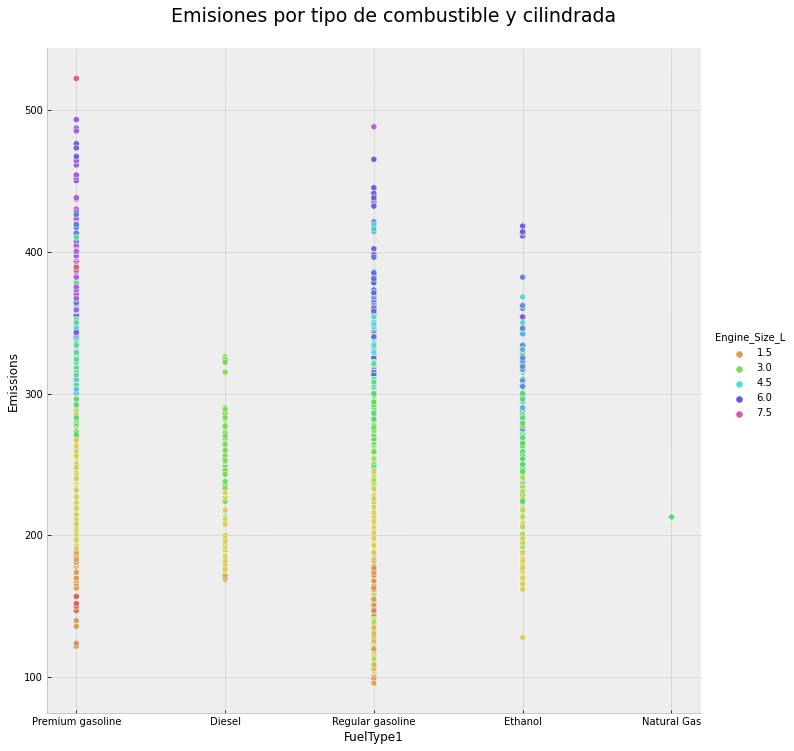

In [ ]:
# Análisis de correlación entre el tipo de combustible y la emisión, con detalle en la cilindrada

combustible_co2 = sns.pairplot(
    CO2,
    x_vars = ['FuelType1'],
    y_vars = ['Emissions'],
    hue = 'Engine_Size_L',
    palette="hls",    
    height = 10
)

combustible_co2.fig.suptitle("Emisiones por tipo de combustible y cilindrada", y = 1.04, fontsize = 19);

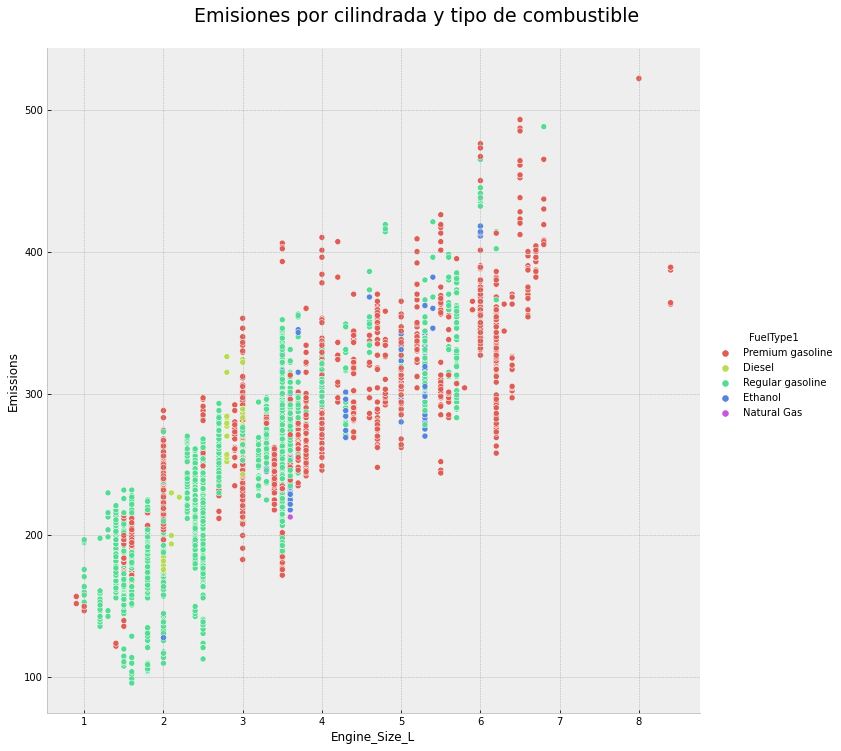

In [ ]:
# Analisis de correlacion entre la cilindrada y la emisión, con detalle en el tipo de combustible

cilindrada_co2 = sns.pairplot(
    CO2,
    x_vars = ['Engine_Size_L'],
    y_vars = ['Emissions'],
    hue = 'FuelType1',
    palette="hls",
    height = 10
)

cilindrada_co2.fig.suptitle("Emisiones por cilindrada y tipo de combustible", y = 1.04, fontsize = 19);

Se observa que el combustible que genera menor emisión de CO2 por km es la nafta súper.

Nota: no se tienen suficientes datos de GNC como para sacar conclusiones con respecto a esta variante de combustible.

# Modelo de Árbol de Decisión y Regresión Logística

## Importamos librerías

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Manejo de Data
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

## Data

Cargamos el Dataset:

In [ ]:
CO2 = pd.read_excel("/content/CO2 Emissions (1).xlsx")
CO2.head()

,Make,Model,Vehicle Class,Engine_Size_L,Cylinders,Transmission,Fuel Type,Fuel Type1,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption Comb (Kmpl),Emissions
0,ACURA,ILX,COMPACT,2.000,4,AS5,Z,Premium gasoline,9.900,6.700,8.500,33,14.030,196
1,ACURA,ILX,COMPACT,2.400,4,M6,Z,Premium gasoline,11.200,7.700,9.600,29,12.329,221
2,ACURA,ILX HYBRID,COMPACT,1.500,4,AV7,Z,Premium gasoline,6.000,5.800,5.900,48,20.407,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500,6,AS6,Z,Premium gasoline,12.700,9.100,11.100,25,10.629,255
4,ACURA,RDX AWD,SUV - SMALL,3.500,6,AS6,Z,Premium gasoline,12.100,8.700,10.600,27,11.479,244


In [ ]:
# Vemos cuántos registros y columnas posee
CO2.shape

(7385, 14)

## Procesamiento y Selección de Variables

Seleccionaremos, en una primera instancia, las variables numéricas (nuestra variable objetivo, es también de este tipo).

In [ ]:
CO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine_Size_L                     7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Type1                        7385 non-null   object 
 8   Fuel Consumption City (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 10  Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 11  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 12  Fuel C

In [ ]:
CO2_num = CO2.select_dtypes('number')
CO2_num.head()

,Engine_Size_L,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption Comb (Kmpl),Emissions
0,2.000,4,9.900,6.700,8.500,33,14.030,196
1,2.400,4,11.200,7.700,9.600,29,12.329,221
2,1.500,4,6.000,5.800,5.900,48,20.407,136
3,3.500,6,12.700,9.100,11.100,25,10.629,255
4,3.500,6,12.100,8.700,10.600,27,11.479,244


In [ ]:
CO2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine_Size_L', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Type1',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
       'Fuel Consumption Comb (Kmpl)', 'Emissions'],
      dtype='object')

Valores duplicados:

In [ ]:
len(CO2_num)

7385

In [ ]:
CO2_num.drop_duplicates(inplace=True) #CO2_num = CO2_num.drop_duplicates()

In [ ]:
len(CO2_num)

7385

### Análisis y Procesamiento de la Variable Cylinders

In [ ]:
# Cantidad de Valores Únicos que tiene
CO2_num.Cylinders.nunique()

8

In [ ]:
# Valores Únicos que tiene
CO2_num.Cylinders.unique()

array([ 4,  6, 12,  8, 10,  5, 16,  3])

In [ ]:
# Conteo de Registros por cada Valor
CO2_num.Cylinders.value_counts()

4     1973
6     1448
8      742
12      94
3       57
10      24
5       21
16       1
Name: Cylinders, dtype: int64

### Transformaciones de Columnas

Como venimos mencionando a lo largo de nuestro análsis, vamos a tomar como variable objetivo a "Emissions".
Para ello, a su vez, vamos a transfromarla y dividirla en dos segmentos:

0 = aceptable = valores menores a 200 g/km

1 = no aceptable = valores mayores a 200 g/km

In [ ]:
# Usando .loc()
CO2_numcp = CO2_num.copy()

CO2_numcp.loc[CO2_numcp.Emissions<=200, 'Emissions'] = 0
CO2_numcp.loc[CO2_numcp.Emissions>200, 'Emissions'] = 1

CO2_numcp['Emissions'].unique()

array([0, 1])

In [ ]:
CO2_numcp.Emissions.value_counts()

1    3370
0     990
Name: Emissions, dtype: int64

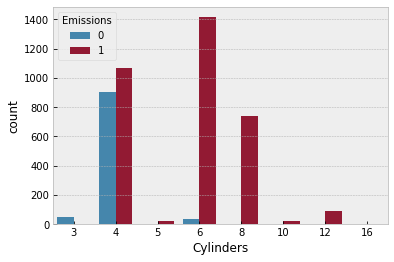

In [ ]:
sns.countplot(x='Cylinders', data = CO2_numcp, hue = 'Emissions')

Como se observa, claramente, el valor aceptable de nuestra variable objetivo se da práctimente sólo en los vehículos que poseen 6 o menos número de Cilindros.

### Variables con Outliers

Datos Atípicos para todas las variables, a través de boxplot:

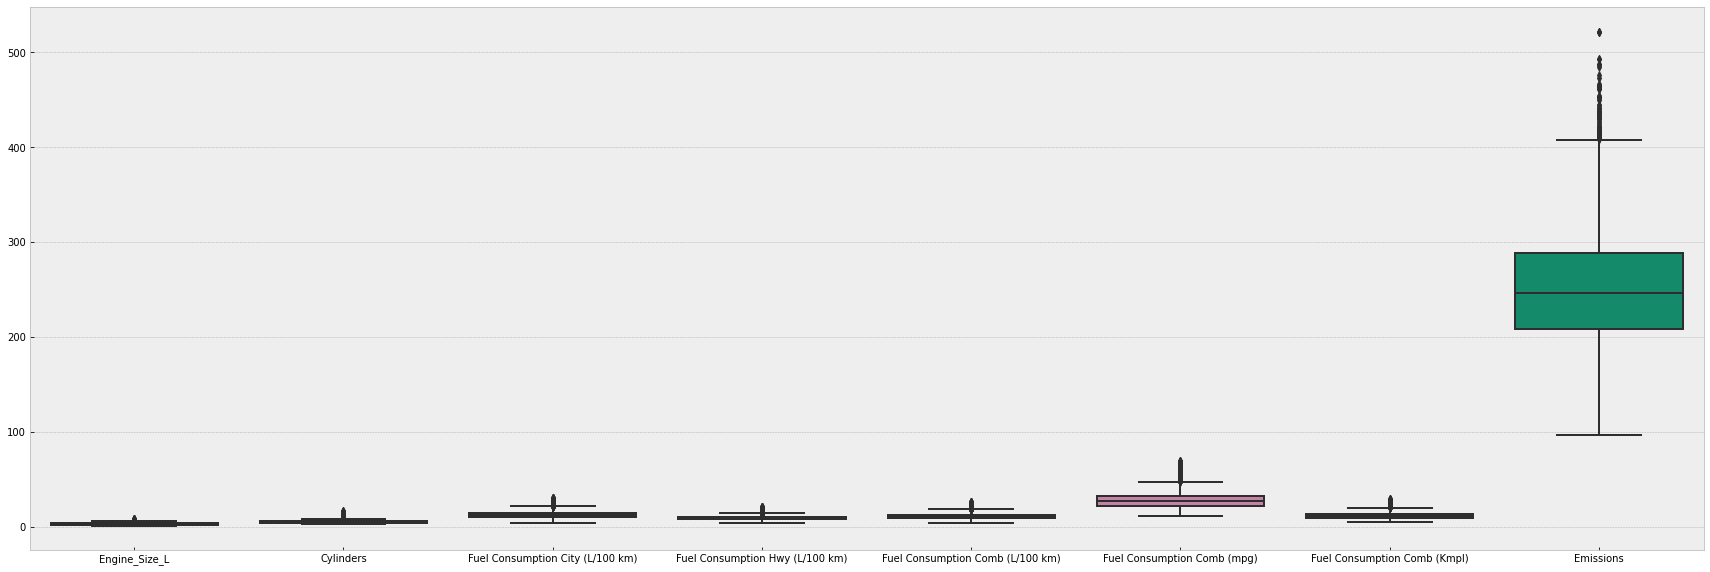

In [ ]:
# Con atípicos
plt.figure(figsize=(30,10))
sns.boxplot(data=CO2)

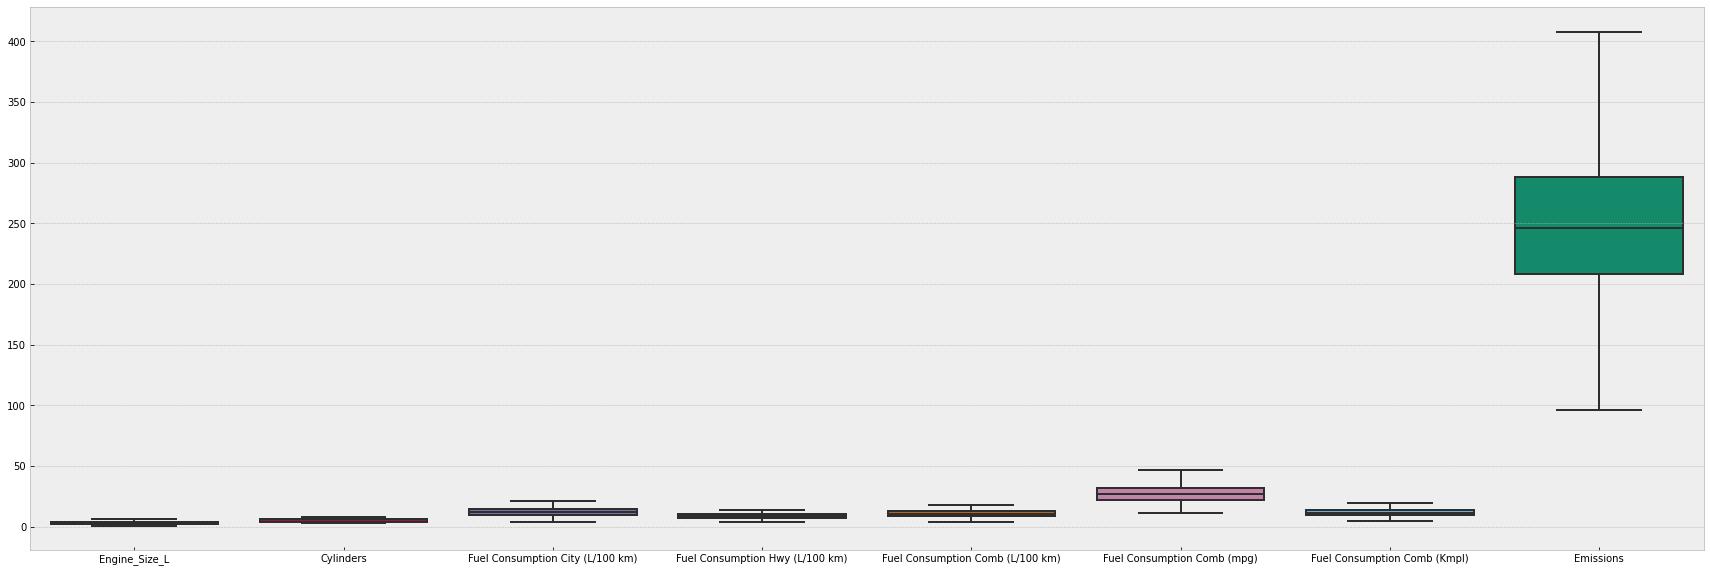

In [ ]:
# Sin atípicos
plt.figure(figsize=(30,10))
sns.boxplot(data=CO2, showfliers=False)

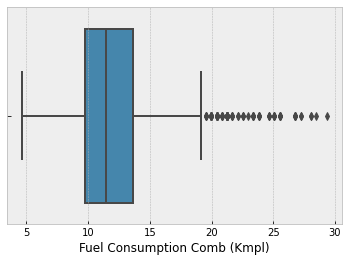

In [ ]:
ax = sns.boxplot(x=CO2_numcp['Fuel Consumption Comb (Kmpl)'])

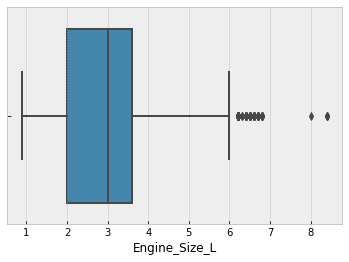

In [ ]:
ax = sns.boxplot(x=CO2_numcp['Engine_Size_L'])

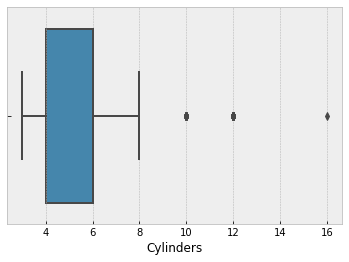

In [ ]:
ax = sns.boxplot(x=CO2_numcp['Cylinders'])

Antes de elegir si hacemos algún tipo de transformación, debemos analizar la relación de los valores outliers con el target:

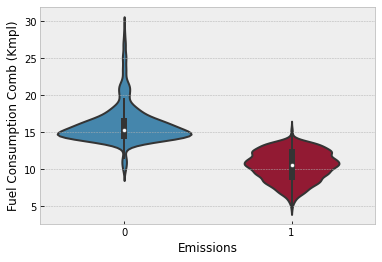

In [ ]:
sns.violinplot(x ='Emissions', y ='Fuel Consumption Comb (Kmpl)', data = CO2_numcp)

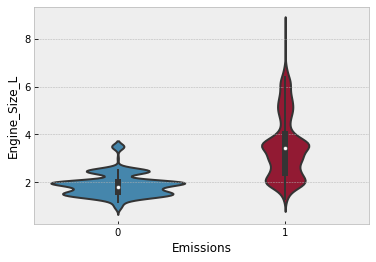

In [ ]:
sns.violinplot(x ='Emissions', y ='Engine_Size_L', data = CO2_numcp)

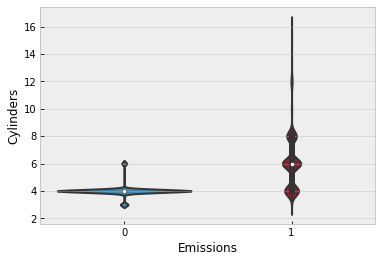

In [ ]:
sns.violinplot(x ='Emissions', y ='Cylinders', data = CO2_numcp)

Decidimos quedarnos con las columnas, sin procesar outliers.

In [ ]:
CO2_numcp.head()

,Engine_Size_L,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption Comb (Kmpl),Emissions
0,2.000,4,9.900,6.700,8.500,33,14.030,0
1,2.400,4,11.200,7.700,9.600,29,12.329,1
2,1.500,4,6.000,5.800,5.900,48,20.407,0
3,3.500,6,12.700,9.100,11.100,25,10.629,1
4,3.500,6,12.100,8.700,10.600,27,11.479,1


## Modelo de Árbol

### Train & Test Split

In [ ]:
# Split del Dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Separamos las Características/Features del Target
X = CO2_numcp.drop('Emissions', axis=1)
y = CO2_numcp['Emissions']

In [ ]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (3052, 7)
Tamaño del set de testeo: (1308, 7)


In [ ]:
# Porcentaje de Clase True en Train
100*y_train.sum()/len(y_train)

77.29357798165138

In [ ]:
# Porcentaje de Clase True en Test
100*y_test.sum()/len(y_test)

77.29357798165138

### Árbol de Decisión

In [ ]:
# Modelos
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

## Entrenamiento, Predicción y Evaluación

In [ ]:
# Entrenamiento
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

### Predicciones

In [ ]:
# Predicciones
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [ ]:
X_test.shape, y_test.shape

((1308, 7), (1308,))

In [ ]:
y_pred.shape

(1308,)

Miramos las 10 primeras predicciones:

In [ ]:
y_pred[:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

Y lo comparamos con el valor real del target de las 10 primeras filas:

In [ ]:
y_test[:10].values

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

### Evaluación

In [ ]:
# Evaluación 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Evaluamos el modelo en el conjunto de testeo:

In [ ]:
recall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 0.9962
Precision: 1.0000
F1: 0.9981
Accuracy: 0.9971


Evaluamos el modelo ya entrenado en el conjunto de testeo:

In [ ]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('METRICAS TEST:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TEST:
Recall: 0.9871
Precision: 0.9775
F1: 0.9823
Accuracy: 0.9725


In [ ]:
confusion_matrix(y_test, y_pred)

array([[274,  23],
       [ 13, 998]])

In [ ]:
y_test.value_counts()

1    1011
0     297
Name: Emissions, dtype: int64

In [ ]:
pd.Series(y_pred).value_counts()

1    1021
0     287
dtype: int64

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       297
           1       0.98      0.99      0.98      1011

    accuracy                           0.97      1308
   macro avg       0.97      0.95      0.96      1308
weighted avg       0.97      0.97      0.97      1308



### Probabilidades

In [ ]:
proba = tree_model.predict_proba(X_test)

proba

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

## Feature Importance

In [ ]:
tree_model.feature_importances_

array([1.18591964e-02, 0.00000000e+00, 2.51425553e-02, 2.77618440e-02,
       9.32426871e-01, 7.78021867e-04, 2.03151129e-03])

In [ ]:
CO2_importancia = pd.DataFrame({'Variable': X_train.columns.values.tolist(),
                               'Importancia': tree_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

CO2_importancia

,Variable,Importancia
4,Fuel Consumption Comb (L/100 km),0.932
3,Fuel Consumption Hwy (L/100 km),0.028
2,Fuel Consumption City (L/100 km),0.025
0,Engine_Size_L,0.012
6,Fuel Consumption Comb (Kmpl),0.002
5,Fuel Consumption Comb (mpg),0.001
1,Cylinders,0.000


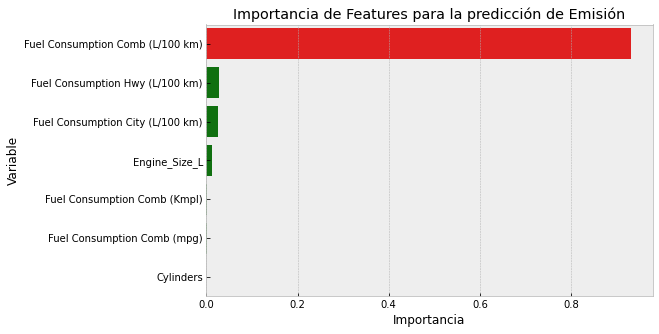

In [ ]:
plt.figure(figsize=(8,5))

values = CO2_importancia.Importancia    

sns.barplot(y=CO2_importancia.Variable,
            x=values,
            palette = ['green' if (x < max(values)) else 'red' for x in values ]
           ).set(title='Importancia de Features para la predicción de Emisión')

plt.show()

Como vemos, luego de estos últimos apartados, el árbol generó un overfitting.

## Regresión Logística

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Estandarizamos la escala de nuestras variables, para hacer un correcto análisis de la importancia de las mismas
scaler.fit(X)
X1 = scaler.transform(X)
X1 = pd.DataFrame(data = X1, columns= X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y,
                                                    test_size=0.3,
                                                    random_state=33,
                                                    stratify= y)



print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (3052, 7)
Tamaño del set de testeo: (1308, 7)


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.24      1.00      0.38       297
           1       1.00      0.06      0.11      1011

    accuracy                           0.27      1308
   macro avg       0.62      0.53      0.25      1308
weighted avg       0.83      0.27      0.17      1308



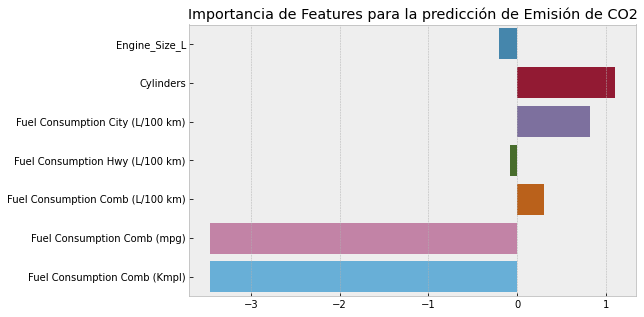

In [ ]:
plt.figure(figsize=(8,5))

values = pd.Series(clf.coef_.flat)  

sns.barplot(y=X1.columns,
            x=values,
           ).set(title='Importancia de Features para la predicción de Emisión de CO2')

plt.show()

Con este último modelo, cambia drásticamente la importancia de las variables analizadas para explicar el comportamiento de la variable objetivo (acrecenta su importancia la variable "consumo combinado de combustible" tanto en mpg como en Kmpl, mientras que mantiene su relevancia en el análisis la variable "Cylinders", la cual hemos tratado en puntos anteriores).

Para la Variable Objetivo, Emisiones de CO2, vemos cómo se relaciona con el resto de las variables del dataset:

Text(0.5, 1.0, 'Emisiones CO2 vs Cilindrada')

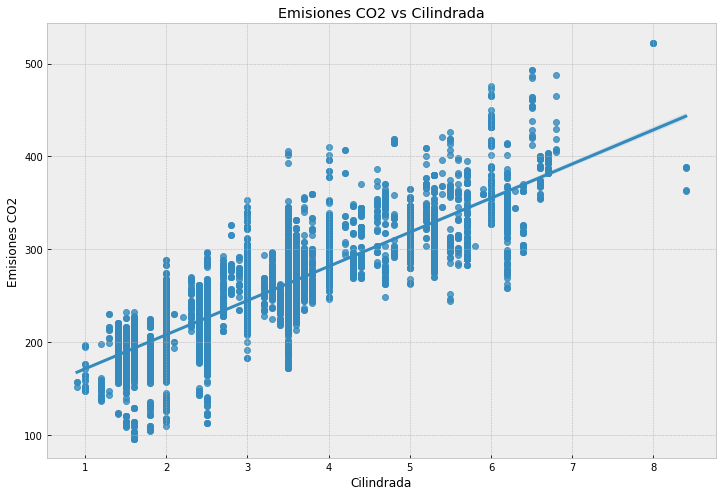

In [ ]:
# Vemos cómo es el modelo de regresión lineal entre dos variables, nuestra variable objetivo y el tamaño en litros del motor:

# Omitir warnings
import warnings
warnings.filterwarnings('ignore')
# Tamaño de figura
fig = plt.figure(figsize=(12, 8))
# Gráfico
ax = sns.regplot(x="Engine_Size_L", y="Emissions", data=CO2)
ax.set(xlabel='Cilindrada', ylabel='Emisiones CO2')
plt.title('Emisiones CO2 vs Cilindrada')

In [ ]:
# Regresión Lineal
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

In [ ]:
# Ahora observamos los distintos indicadores resultantes de esta relación/regresión:
model = smf.ols('Emissions ~ Engine_Size_L', data=CO2)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Emissions   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.941e+04
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:41:12   Log-Likelihood:                -35770.
No. Observations:                7385   AIC:                         7.154e+04
Df Residuals:                    7383   BIC:                         7.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       134.3659      0.908    148.056

R2=0.724 quiere decir que la emisión de gases CO2 al ambiente se describe en un 72.4% de manera lineal en función del tamaño en litros del motor.  p-value=0, entonces el intercepto no es cero. La prueba ómnibus dice que la varianza de los datos es bastante amplia, ya que el resultado es muy distinto a cero.